In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas_profiling as pdp #特徴量一覧表示
import sweetviz as sv #HTML形式で一覧表示
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.model_selection import train_test_split,GridSearchCV
import os
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [45]:
for dirname, _, filenames in os.walk('./atmacup10_dataset/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./atmacup10_dataset/train.csv
./atmacup10_dataset/maker.csv
./atmacup10_dataset/atmacup10__sample_submission.csv
./atmacup10_dataset/palette.csv
./atmacup10_dataset/technique.csv
./atmacup10_dataset/object_collection.csv
./atmacup10_dataset/principal_maker.csv
./atmacup10_dataset/production_place.csv
./atmacup10_dataset/material.csv
./atmacup10_dataset/test.csv
./atmacup10_dataset/principal_maker_occupation.csv
./atmacup10_dataset/color.csv
./atmacup10_dataset/historical_person.csv


In [114]:
inp = './atmacup10_dataset/'
inp

'./atmacup10_dataset/'

In [115]:
df_train = pd.read_csv(inp + 'train.csv')

In [129]:
df_train.head()

object_id         art_series_id                        title  \
0  0011d6be41612ec9eae3  93c092ba70beab248f31        The Avenue of Birches   
1  0012765f7a97ccc3e9e9  95c14fb11c54281ad7e0              Struik in bloei   
2  0017be8caa87206532cb  4c406890d208fe01f8fb        Portret van een vrouw   
3  00181d86ff1a7b95864e  fa0891535500a4973db2             A St Bernard Dog   
4  001c52ae28ec106d9cd5  8065ed5063c5887e677d  Woelige zee met zeilschepen   

                                         description  \
0                                                NaN   
1                                                NaN   
2     Portret van eenvrouw, zittend naast een tafel.   
3  Een sint-bernardshond, staand in een landschap...   
4                       Woelige zee met zeilschepen.   

                                          long_title   principal_maker  \
0   The Avenue of Birches, Jan Hackaert, 1660 - 1685      Jan Hackaert   
1  Struik in bloei, Richard Tepe (attributed to),...      Richard Tepe   
2  Portret van een vrouw, Tresling & Comp., 1860 ...  Tresling & Comp.   
3  A St Bernard Dog, Bernard te Gempt, c. 1850 - ...  Bernard te Gempt   
4  Woelige zee met zeilschepen, anonymous, 1825 -...         anonymous   

  principal_or_first_maker                                sub_title  \
0             Jan Hackaert  h 66.5cm × w 53.7cm × t 2.5cm × d 4.7cm   
1             Richard Tepe                        h 165mm × w 223mm   
2         Tresling & Comp.                          h 87mm × w 56mm   
3         Bernard te Gempt                h 179cm × w 248cm × t 4cm   
4                anonymous              h 13cm × w 17.5cm × d 0.7cm   

     copyright_holder                   more_title  ... dating_year_late  \
0                 NaN        The Avenue of Birches  ...           1685.0   
1  erven Richard Tepe              Struik in bloei  ...           1930.0   
2                 NaN        Portret van een vrouw  ...           1880.0   
3                 NaN             A St Bernard Dog  ...           1879.0   
4                 NaN  Woelige zee met zeilschepen  ...           1874.0   

  likes acquisition_method_bequest  acquisition_method_exchange  \
0    48                          0                            0   
1     2                          0                            0   
2     5                          0                            0   
3   100                          1                            0   
4     7                          0                            0   

   acquisition_method_gift  acquisition_method_loan  \
0                        0                        0   
1                        0                        0   
2                        1                        0   
3                        0                        0   
4                        0                        0   

   acquisition_method_nationalization 1795  acquisition_method_purchase  \
0                                        0                            1   
1                                        0                            1   
2                                        0                            0   
3                                        0                            0   
4                                        0                            0   

   acquisition_method_transfer  acquisition_method_unknown  
0                            0                           0  
1                            0                           0  
2                            0                           0  
3                            0                           0  
4                            0                           1  

[5 rows x 26 columns]

In [130]:
df_test = pd.read_csv(inp + 'test.csv')

In [131]:
df_test.head()

object_id         art_series_id  \
0  000405d9a5e3f49fc49d  a2aabd3cc8859f4260ad   
1  001020bd00b149970f78  5d6a286cc3ab64c2c043   
2  00133be3ff222c9b74b0  e2cbc48624f787d2edd2   
3  001b2b8c9d3aa1534dfe  2435b200cca8b2f3ce3a   
4  00220cd4bfa082d2aa20  aa03c5a95d229166982f   

                                               title  \
0  Twee personen voor de Duizendjarige den te Wol...   
1  Portrait of Philipp Ernst, Count of Hohenlohe ...   
2               Alva eist de Tiende Penning op, 1569   
3  Groepen uit "Zes meisjes en geen man" ten Gouv...   
4  Christus op een voetstuk met rondom zijn voorv...   

                                         description  \
0                                                NaN   
1  Portret van Philip Ernst (1585-1629), graaf va...   
2  De hertog van Alva eist in een vergadering van...   
3  Scène uit de opvoering getiteld "Zes meisjes e...   
4  In het midden staat Christus op een voetstuk. ...   

                                          long_title  \
0  Twee personen voor de Duizendjarige den te Wol...   
1  Portrait of Philipp Ernst, Count of Hohenlohe ...   
2  Alva eist de Tiende Penning op, 1569, Theodoor...   
3  Groepen uit "Zes meisjes en geen man" ten Gouv...   
4  Christus op een voetstuk met rondom zijn voorv...   

              principal_maker    principal_or_first_maker  \
0          Bernardus Bruining          Bernardus Bruining   
1  Jan Antonisz van Ravesteyn  Jan Antonisz van Ravesteyn   
2             Theodoor Koning             Theodoor Koning   
3       Théodore van Lelyveld       Théodore van Lelyveld   
4                  Jan Luyken                  Jan Luyken   

             sub_title             copyright_holder  \
0    h 167mm × w 108mm                          NaN   
1  h 29.7cm × w 24.1cm                          NaN   
2    h 270mm × w 215mm                          NaN   
3    h 116mm × w 159mm  erven Théodore van Lelyveld   
4    h 108mm × w 184mm                          NaN   

                                          more_title    acquisition_method  \
0  Twee personen voor de Duizendjarige den te Wol...              transfer   
1  Portrait of Philipp Ernst, Count of Hohenlohe ...  nationalization 1795   
2  Alva eist de Tiende Penning op, 1569 Vordering...                  gift   
3  Groepen uit "Zes meisjes en geen man" ten Gouv...              purchase   
4  Christus op een voetstuk met rondom zijn voorv...               unknown   

      acquisition_date                      acquisition_credit_line  \
0  1994-01-01T00:00:00                                          NaN   
1  1798-09-01T00:00:00                                          NaN   
2  2002-01-01T00:00:00  Gift of J.U. Flohil-de Jong, Santpoort-Zuid   
3  2009-12-01T00:00:00                                          NaN   
4                  NaN                                          NaN   

  dating_presenting_date  dating_sorting_date  dating_period  \
0            1850 - 1900               1850.0             19   
1      c. 1609 - c. 1633               1609.0             17   
2                   1779               1779.0             18   
3            1895 - 1898               1895.0             19   
4                   1700               1700.0             17   

   dating_year_early  dating_year_late  
0             1850.0            1900.0  
1             1609.0            1633.0  
2             1779.0            1779.0  
3             1895.0            1898.0  
4             1700.0            1700.0

In [87]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12026 entries, 0 to 12025
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   object_id                 12026 non-null  object 
 1   art_series_id             12026 non-null  object 
 2   title                     12026 non-null  object 
 3   description               8506 non-null   object 
 4   long_title                12026 non-null  object 
 5   principal_maker           12026 non-null  object 
 6   principal_or_first_maker  12025 non-null  object 
 7   sub_title                 11992 non-null  object 
 8   copyright_holder          713 non-null    object 
 9   more_title                11891 non-null  object 
 10  acquisition_method        11830 non-null  object 
 11  acquisition_date          11009 non-null  object 
 12  acquisition_credit_line   3525 non-null   object 
 13  dating_presenting_date    12016 non-null  object 
 14  dating

In [133]:
# nullの数確認
df_train.isnull().sum(), df_test.isnull().sum()

(object_id                                      0
 art_series_id                                  0
 title                                          0
 description                                 3203
 long_title                                     0
 principal_maker                                0
 principal_or_first_maker                       0
 sub_title                                      0
 copyright_holder                           10055
 more_title                                     0
 acquisition_date                               0
 acquisition_credit_line                     7330
 dating_presenting_date                         0
 dating_sorting_date                            0
 dating_period                                  0
 dating_year_early                              0
 dating_year_late                               0
 likes                                          0
 acquisition_method_bequest                     0
 acquisition_method_exchange                    0


In [58]:
# nullの内容確認
df_train[df_train['copyright_holder'].isnull()]

object_id         art_series_id  \
0      0011d6be41612ec9eae3  93c092ba70beab248f31   
2      0017be8caa87206532cb  4c406890d208fe01f8fb   
3      00181d86ff1a7b95864e  fa0891535500a4973db2   
4      001c52ae28ec106d9cd5  8065ed5063c5887e677d   
5      001f4c71b4d53497b531  63b35be23b58a65e564d   
...                     ...                   ...   
12021  ffedf8af4fd5b3873164  2e4695e7f3260d52b3e6   
12022  ffee34705ea44e1a0f79  7aa656a9ef243d93d009   
12023  ffefbe1faf771aa4f790  e79c2e74ed17533a7e56   
12024  fff08e76cbb969eaddc7  510358b74c1104edbbbd   
12025  fff1d87d79953ddab2c6  b5b9203624d1f0db99a9   

                                                   title  \
0                                  The Avenue of Birches   
2                                  Portret van een vrouw   
3                                       A St Bernard Dog   
4                            Woelige zee met zeilschepen   
5                        Personificatie van de zedigheid   
...                                                  ...   
12021              De schilder H.W. Mesdag voor een doek   
12022  Kaart van de streek tussen Mannheim en Landau,...   
12023  Storm op het IJ aan het Blauwhoofd van Amsterd...   
12024                      Het rad van fortuin, ca. 1689   
12025                     The Adoration of the Shepherds   

                                             description  \
0                                                    NaN   
2         Portret van eenvrouw, zittend naast een tafel.   
3      Een sint-bernardshond, staand in een landschap...   
4                           Woelige zee met zeilschepen.   
5      Een vrouwfiguur als personificatie van de zedi...   
...                                                  ...   
12021                                                NaN   
12022  Kaart van de streek tussen Mannheim, Speyer en...   
12023  Zeilschepen in de problemen op het IJ ter hoog...   
12024  Het rad van fortuin, ca. 1689. Spotprent op de...   
12025  De aanbidding der herders. Maria knielt achter...   

                                              long_title  \
0       The Avenue of Birches, Jan Hackaert, 1660 - 1685   
2      Portret van een vrouw, Tresling & Comp., 1860 ...   
3      A St Bernard Dog, Bernard te Gempt, c. 1850 - ...   
4      Woelige zee met zeilschepen, anonymous, 1825 -...   
5      Personificatie van de zedigheid, C.A. Tuchs, 1867   
...                                                  ...   
12021  De schilder H.W. Mesdag voor een doek, Delboy ...   
12022  Kaart van de streek tussen Mannheim en Landau,...   
12023  Storm op het IJ aan het Blauwhoofd van Amsterd...   
12024  Het rad van fortuin, ca. 1689, Romeyn de Hoogh...   
12025  The Adoration of the Shepherds, Bartolommeo Su...   

               principal_maker principal_or_first_maker  \
0                 Jan Hackaert             Jan Hackaert   
2             Tresling & Comp.         Tresling & Comp.   
3             Bernard te Gempt         Bernard te Gempt   
4                    anonymous                anonymous   
5                   C.A. Tuchs               C.A. Tuchs   
...                        ...                      ...   
12021            Delboy & Baer            Delboy & Baer   
12022           Abraham Allard           Abraham Allard   
12023  Noach van der Meer (II)  Noach van der Meer (II)   
12024         Romeyn de Hooghe         Romeyn de Hooghe   
12025       Bartolommeo Suardi       Bartolommeo Suardi   

                                     sub_title copyright_holder  \
0      h 66.5cm × w 53.7cm × t 2.5cm × d 4.7cm              NaN   
2                              h 87mm × w 56mm              NaN   
3                    h 179cm × w 248cm × t 4cm              NaN   
4                  h 13cm × w 17.5cm × d 0.7cm              NaN   
5                            h 228mm × w 131mm              NaN   
...                                        ...              ...   
12021                         h 90mm × w

In [117]:
# 欠損値削除
df_train = df_train.dropna(subset=['sub_title', 'principal_or_first_maker', 'dating_presenting_date', 'dating_sorting_date', 'dating_year_early', 'dating_year_late', 'more_title', 'acquisition_method', 'acquisition_date'])

In [118]:
# ダミー変数化
df_train = pd.get_dummies(df_train, columns=['acquisition_method'])

In [134]:
df_test = pd.get_dummies(df_test, columns=['acquisition_method'])

In [120]:
df_train.head(1)

object_id         art_series_id                  title  \
0  0011d6be41612ec9eae3  93c092ba70beab248f31  The Avenue of Birches   

  description                                        long_title  \
0         NaN  The Avenue of Birches, Jan Hackaert, 1660 - 1685   

  principal_maker principal_or_first_maker  \
0    Jan Hackaert             Jan Hackaert   

                                 sub_title copyright_holder  \
0  h 66.5cm × w 53.7cm × t 2.5cm × d 4.7cm              NaN   

              more_title  ... dating_year_late likes  \
0  The Avenue of Birches  ...           1685.0    48   

  acquisition_method_bequest  acquisition_method_exchange  \
0                          0                            0   

   acquisition_method_gift  acquisition_method_loan  \
0                        0                        0   

   acquisition_method_nationalization 1795  acquisition_method_purchase  \
0                                        0                            1   

   acquisition_method_transfer  acquisition_method_unknown  
0                            0                           0  

[1 rows x 26 columns]

In [144]:
df_train[select_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10764 entries, 0 to 12025
Data columns (total 12 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   dating_sorting_date                      10764 non-null  float64
 1   dating_period                            10764 non-null  int64  
 2   dating_year_early                        10764 non-null  float64
 3   dating_year_late                         10764 non-null  float64
 4   acquisition_method_bequest               10764 non-null  uint8  
 5   acquisition_method_exchange              10764 non-null  uint8  
 6   acquisition_method_gift                  10764 non-null  uint8  
 7   acquisition_method_loan                  10764 non-null  uint8  
 8   acquisition_method_nationalization 1795  10764 non-null  uint8  
 9   acquisition_method_purchase              10764 non-null  uint8  
 10  acquisition_method_transfer              10764

In [143]:
# 必要なカラムのみ抽出
select_columns = ['dating_sorting_date', 'dating_period', 'dating_year_early', 'dating_year_late', 'acquisition_method_bequest', 'acquisition_method_exchange', 'acquisition_method_gift', 'acquisition_method_loan', 'acquisition_method_nationalization 1795', 'acquisition_method_purchase', 'acquisition_method_transfer', 'acquisition_method_unknown']
df_train[select_columns]

dating_sorting_date  dating_period  dating_year_early  \
0                   1660.0             17             1660.0   
1                   1900.0             19             1900.0   
2                   1860.0             19             1860.0   
3                   1850.0             19             1850.0   
4                   1825.0             19             1825.0   
...                    ...            ...                ...   
12021               1900.0             19             1900.0   
12022               1701.0             18             1701.0   
12023               1778.0             18             1778.0   
12024               1689.0             17             1689.0   
12025               1500.0             15             1500.0   

       dating_year_late  acquisition_method_bequest  \
0                1685.0                           0   
1                1930.0                           0   
2                1880.0                           0   
3                1879.0                           1   
4                1874.0                           0   
...                 ...                         ...   
12021            1920.0                           0   
12022            1714.0                           0   
12023            1778.0                           0   
12024            1690.0                           0   
12025            1535.0                           1   

       acquisition_method_exchange  acquisition_method_gift  \
0                                0                        0   
1                                0                        0   
2                                0                        1   
3                                0                        0   
4                                0                        0   
...                            ...                      ...   
12021                            0                        0   
12022                            0                        0   
12023                            0                        0   
12024                            0                        0   
12025                            0                        0   

       acquisition_method_loan  acquisition_method_nationalization 1795  \
0                            0                                        0   
1                            0                                        0   
2                            0                                        0   
3                            0                                        0   
4                            0                                        0   
...                        ...                                      ...   
12021                        0                                        0   
12022                        0                                        0   
12023                        0                                        0   
12024                        0                                        0   
12025                        0                                        0   

       acquisition_method_purchase  acquisition_method_transfer  \
0                                1                            0   
1                                1                            0   
2                                0                            0   
3                                0                            0   
4                                0                            0   
...                            ...                          ...   
12021                            0                            1   
12022                            1                            0   
12023                            0                            1   
12024                            1                            0   
12025                            0                            0   

       acquisition_method_unknown  
0                               0  
1                               0  
2     

In [145]:
df_test[select_columns].head()

dating_sorting_date  dating_period  dating_year_early  dating_year_late  \
0               1850.0             19             1850.0            1900.0   
1               1609.0             17             1609.0            1633.0   
2               1779.0             18             1779.0            1779.0   
3               1895.0             19             1895.0            1898.0   
4               1700.0             17             1700.0            1700.0   

   acquisition_method_bequest  acquisition_method_exchange  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   acquisition_method_gift  acquisition_method_loan  \
0                        0                        0   
1                        0                        0   
2                        1                        0   
3                        0                        0   
4                        0                        0   

   acquisition_method_nationalization 1795  acquisition_method_purchase  \
0                                        0                            0   
1                                        1                            0   
2                                        0                            0   
3                                        0                            1   
4                                        0                            0   

   acquisition_method_transfer  acquisition_method_unknown  
0                            1                           0  
1                            0                           0  
2                            0                           0  
3                            0                           0  
4                            0                           1

In [60]:
pdp.ProfileReport(df_train)

Summarize dataset:   0%|          | 0/34 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:>

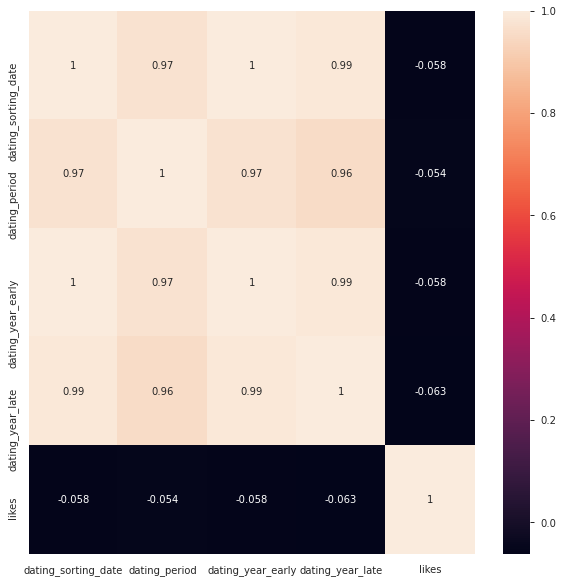

In [61]:
corr=(df_train.corr())
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

In [15]:
# pip install sweetviz

In [14]:
# import sweetviz as sv

# my_report = sv.analyze(df_train)
# my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

In [62]:
df_train.head(1)

object_id         art_series_id                  title  \
0  0011d6be41612ec9eae3  93c092ba70beab248f31  The Avenue of Birches   

  description                                        long_title  \
0         NaN  The Avenue of Birches, Jan Hackaert, 1660 - 1685   

  principal_maker principal_or_first_maker  \
0    Jan Hackaert             Jan Hackaert   

                                 sub_title copyright_holder  \
0  h 66.5cm × w 53.7cm × t 2.5cm × d 4.7cm              NaN   

              more_title acquisition_method     acquisition_date  \
0  The Avenue of Birches           purchase  1808-01-01T00:00:00   

  acquisition_credit_line dating_presenting_date  dating_sorting_date  \
0                     NaN            1660 - 1685               1660.0   

   dating_period  dating_year_early  dating_year_late  likes  
0             17             1660.0            1685.0     48

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


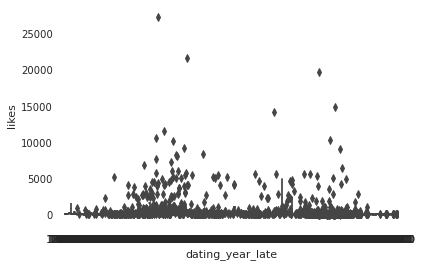

In [63]:
dating_year_late = df_train['dating_year_late']
likes = df_train['likes']
sns.boxplot(dating_year_late, likes)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


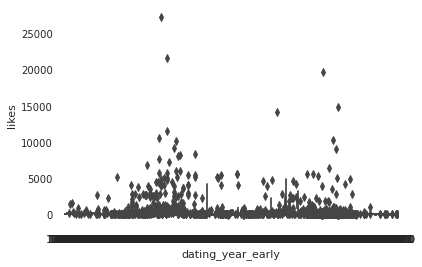

In [64]:
dating_year_early = df_train['dating_year_early']
likes = df_train['likes']
sns.boxplot(dating_year_early, likes)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


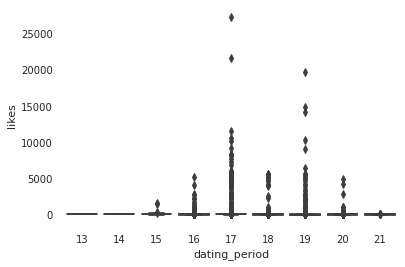

In [65]:
dating_period = df_train['dating_period']
likes = df_train['likes']
sns.boxplot(dating_period, likes)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


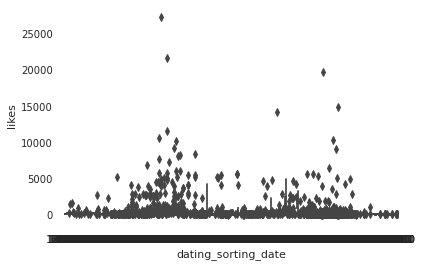

In [66]:
dating_sorting_date = df_train['dating_sorting_date']
likes = df_train['likes']
sns.boxplot(dating_sorting_date, likes)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


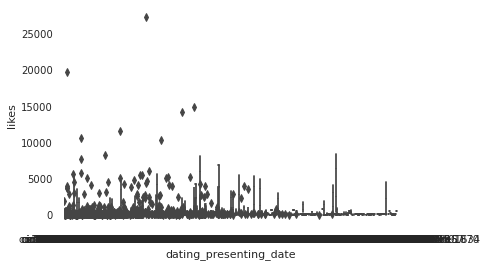

In [67]:
dating_presenting_date = df_train['dating_presenting_date']
likes = df_train['likes']
sns.boxplot(dating_presenting_date, likes)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


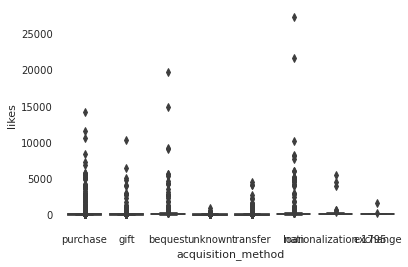

In [68]:
acquisition_method = df_train['acquisition_method']
likes = df_train['likes']
sns.boxplot(acquisition_method, likes)
plt.show()

In [141]:
df_train[select_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10764 entries, 0 to 12025
Data columns (total 20 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   title                                    10764 non-null  object 
 1   long_title                               10764 non-null  object 
 2   principal_maker                          10764 non-null  object 
 3   principal_or_first_maker                 10764 non-null  object 
 4   sub_title                                10764 non-null  object 
 5   more_title                               10764 non-null  object 
 6   acquisition_date                         10764 non-null  object 
 7   dating_presenting_date                   10764 non-null  object 
 8   dating_sorting_date                      10764 non-null  float64
 9   dating_period                            10764 non-null  int64  
 10  dating_year_early                        10764

In [146]:
# 標準化を実施する
ss = StandardScaler()
df_train[select_columns] = ss.fit_transform(df_train[select_columns])
df_test[select_columns] = ss.fit_transform(df_test[select_columns])

In [147]:
# 説明変数をX、目的変数をyとする
X = df_train[select_columns]
y = df_train['likes']

In [148]:
# Xとyを学習データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=0)

In [156]:
pip install lightgbm

     |████████████████████████████████| 1.8 MB 7.5 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [159]:
import lightgbm as lgbm
from sklearn.metrics import mean_squared_error as MSE

In [160]:
df_train[select_columns].shape, df_test[select_columns].shape

((10764, 12), (12008, 12))

In [165]:
lgbm_train = lgbm.Dataset(X_train, y_train)
lgbm_eval = lgbm.Dataset(X_test, y_test)

In [166]:
params = {'metric': 'rmse',
          'max_depth' : 9}

In [167]:
gbm = lgbm.train(params,
                lgbm_train,
                valid_sets=lgb_eval,
                num_boost_round=10000,
                early_stopping_rounds=100,
                verbose_eval=50)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000616 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 755
[LightGBM] [Info] Number of data points in the train set: 6996, number of used features: 11
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 83.321469
Training until validation scores don't imp

In [172]:
from sklearn.metrics import mean_squared_log_error

In [173]:
y_pred_train = gbm.predict(X_train)
rmsle_train = np.sqrt(mean_squared_log_error(y_train, y_pred_train))
y_pred_test = gbm.predict(X_test)

# RMSEの算出
rmsle_test = np.sqrt(mean_squared_log_error(y_test, y_pred_test))

In [174]:
rmsle_train, rmsle_test

(3.122581168232719, 3.1391726835565934)